In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [48]:
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = (12,4)

C:\Users\Ivan\AppData\Local\Temp\ipykernel_2232\2294268124.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [49]:
data_siap = pd.read_parquet(r"..\..\data\clean_data\siap.parquet.zip")

In [50]:
data_siap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3277140 entries, 0 to 3277139
Data columns (total 6 columns):
 #   Column     Dtype         
---  ------     -----         
 0   Entidad    category      
 1   Municipio  category      
 2   Cultivo    category      
 3   fecha      datetime64[ns]
 4   variable   object        
 5   values     float64       
dtypes: category(3), datetime64[ns](1), float64(1), object(1)
memory usage: 87.6+ MB


In [51]:
# data_snim = data_snim.set_index("fecha")

In [52]:
agave_data = data_siap[data_siap["Cultivo"] == "Agave"]

In [53]:
agave_jalisco = agave_data[(agave_data["Entidad"] == "Jalisco")]
# agave_sembrada = agave_jalisco[(agave_jalisco["variable"]=='Sembrada')]

In [54]:
agave_jal_01 = agave_jalisco.set_index("fecha").loc["2020-01-01"]
agave_jal_01.head()

,Entidad,Municipio,Cultivo,variable,values
fecha,,,,,
2020-01-01,Jalisco,Acatic,Agave,Sembrada,1075.00
2020-01-01,Jalisco,Acatlán de Juárez,Agave,Sembrada,326.00
2020-01-01,Jalisco,Ahualulco de Mercado,Agave,Sembrada,705.00
2020-01-01,Jalisco,Amacueca,Agave,Sembrada,125.43
2020-01-01,Jalisco,Amatitán,Agave,Sembrada,1575.00


In [55]:
agave_jal_01[agave_jal_01["variable"]=="Rendimiento (udm/ha)"]["values"].sum()

1659.05

In [56]:
agave_pivot = agave_jalisco.pivot_table(index=["fecha"], columns="variable", values="values")
agave_pivot.head()

variable,Cosechada,Producción,Rendimiento (udm/ha),Sembrada,Siniestrada
fecha,,,,,
2020-01-01,9.556701,829.375876,17.103608,762.108454,0.0
2020-02-01,46.453608,1547.764124,19.783402,762.108454,0.0
2020-03-01,57.865979,3080.104536,35.443196,762.108454,0.0
2020-04-01,60.443299,3543.125052,36.036907,762.108454,0.0
2020-05-01,75.608247,6457.736082,52.837320,762.108454,0.0


In [57]:
municipio = agave_pivot.index.get_level_values(0).unique()[0]
municipio

Timestamp('2020-01-01 00:00:00')

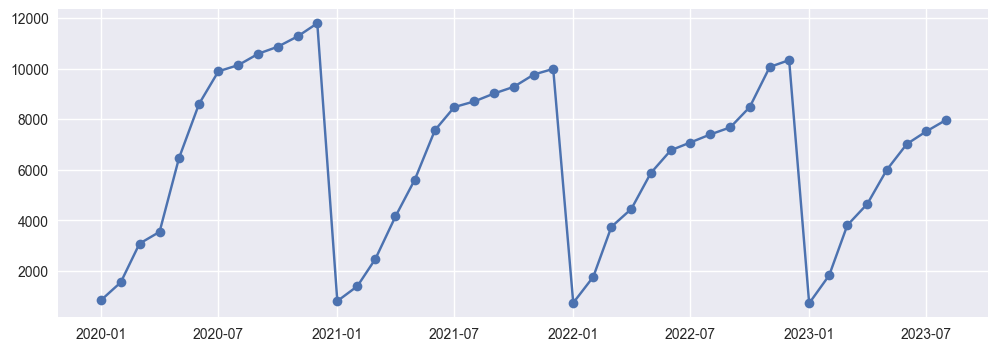

In [58]:
fig, ax = plt.subplots()
ax.plot(agave_pivot["Producción"], '-o', label='sembrado')
plt.show()

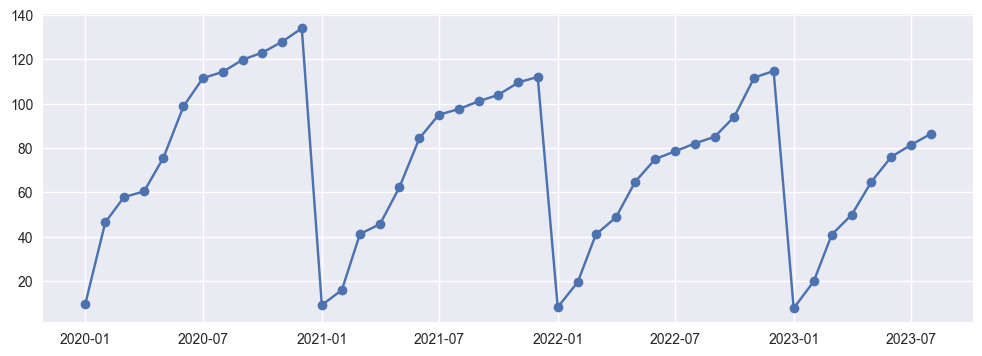

In [59]:
fig, ax = plt.subplots()
ax.plot(agave_pivot["Cosechada"], '-o', label='sembrado')
plt.show()

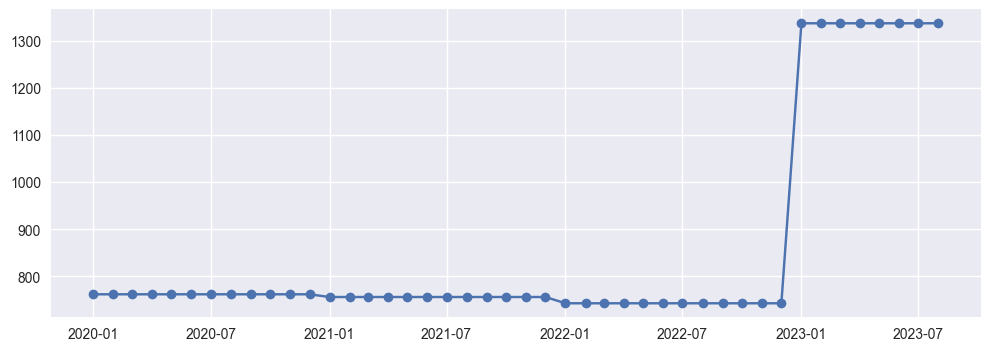

In [60]:
fig, ax = plt.subplots()
ax.plot(agave_pivot["Sembrada"], '-o', label='sembrado')
plt.show()

In [61]:
data_siap.head()

,Entidad,Municipio,Cultivo,fecha,variable,values
0,Aguascalientes,Aguascalientes,Agave,2020-04-01,Sembrada,8.0
1,Baja California,Ensenada,Agave,2020-04-01,Sembrada,1.0
2,Colima,Manzanillo,Agave,2020-04-01,Sembrada,1.4
3,Durango,Durango,Agave,2020-04-01,Sembrada,12.0
4,Durango,Mezquital,Agave,2020-04-01,Sembrada,110.0


In [62]:
data_siap["Cultivo"] = data_siap["Cultivo"].str.lower()

In [63]:
production_jalisco = data_siap[data_siap["Entidad"] == "Jalisco"]

In [64]:
tipo_siembra = data_siap["Cultivo"].unique()

In [65]:
frutas_str  = 'JITOMATE, CHILE VERDE, LIMÓN, PEPINO, PLÁTANO, MANGO, GARBANZO, BRÓCOLI, CEBOLLA, SANDÍA, PAPAYA, CALABACITA, LECHUGA, TOMATE VERDE, ESPÁRRAGO, FRAMBUESA, NOPALITOS, NUEZ, FRESA, TORONJA, ZARZAMORA, PIÑA, COLIFLOR, FRIJOL, BERENJENA, UVA DE MESA, GUAYABA, NARANJA, PAPA, MELÓN, MANZANA, PERA, DURAZNO'
frutas = frutas_str.lower().split(", ")

In [66]:
prod_validos_jalisco = production_jalisco[production_jalisco["Cultivo"].isin(frutas)]

In [67]:
prdocut_x_tipo = prod_validos_jalisco.pivot_table(index=["Cultivo", "fecha"], columns="variable", values="values")
prdocut_x_tipo.head()

variable            Cosechada  Producción  Rendimiento (udm/ha)  Sembrada  \
Cultivo fecha                                                               
brócoli 2020-01-01        0.0       0.000                 0.000  81.93125   
        2020-02-01        0.0       0.000                 0.000  81.20500   
        2020-03-01        0.0       0.000                 0.000  94.00000   
        2020-04-01       50.0    1106.000                 2.212  94.00000   
        2020-05-01       87.5    1685.963                14.802  94.00000   

variable            Siniestrada  
Cultivo fecha                    
brócoli 2020-01-01          0.0  
        2020-02-01          0.0  
        2020-03-01          0.0  
        2020-04-01          0.0  
        2020-05-01          0.0

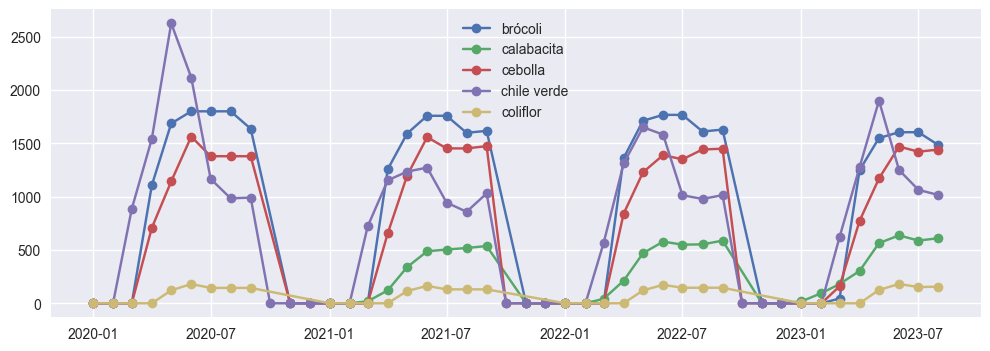

In [68]:
fig, ax = plt.subplots()
for cat in prod_validos_jalisco["Cultivo"].unique()[:5]:
    ax.plot(prdocut_x_tipo["Producción"].loc[cat], '-o', label=cat)
ax.legend()
plt.show()

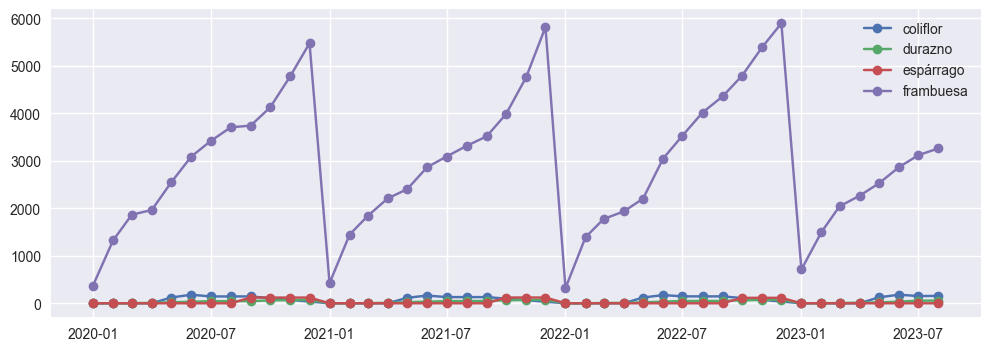

In [69]:
fig, ax = plt.subplots()
for cat in prod_validos_jalisco["Cultivo"].unique()[4:8]:
    ax.plot(prdocut_x_tipo["Producción"].loc[cat], '-o', label=cat)
ax.legend()
plt.show()

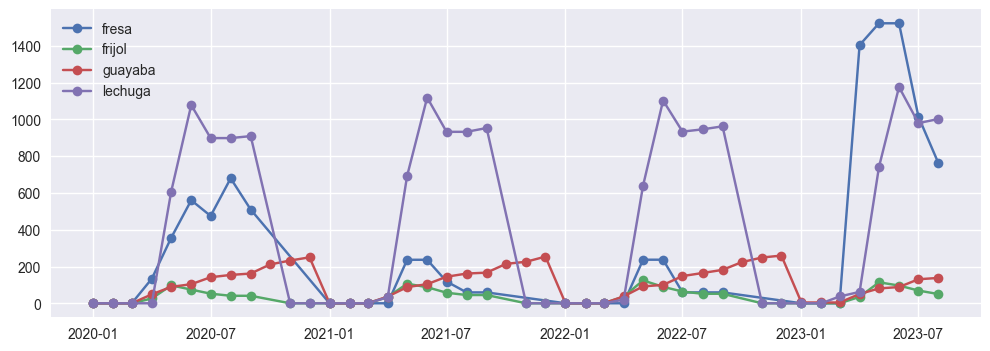

In [70]:
fig, ax = plt.subplots()
for cat in prod_validos_jalisco["Cultivo"].unique()[8:12]:
    ax.plot(prdocut_x_tipo["Producción"].loc[cat], '-o', label=cat)
ax.legend()
plt.show()

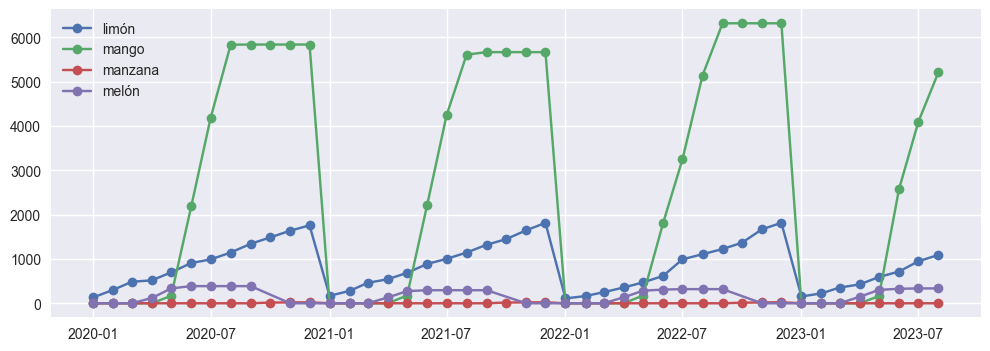

In [71]:
fig, ax = plt.subplots()
for cat in prod_validos_jalisco["Cultivo"].unique()[12:16]:
    ax.plot(prdocut_x_tipo["Producción"].loc[cat], '-o', label=cat)
ax.legend()
plt.show()

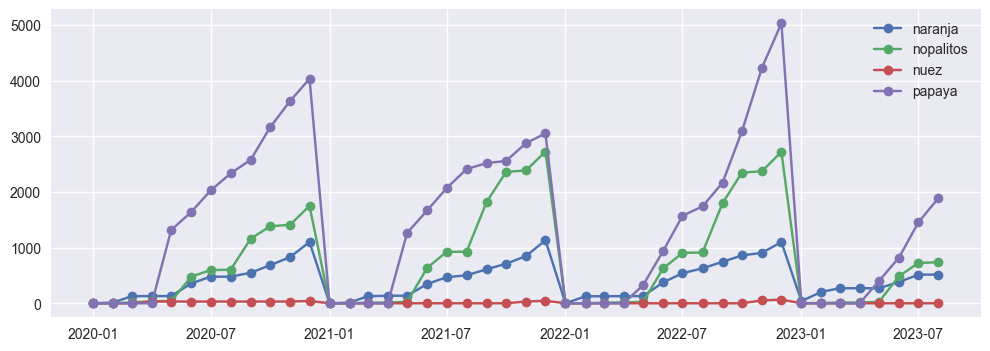

In [72]:
fig, ax = plt.subplots()
for cat in prod_validos_jalisco["Cultivo"].unique()[16:20]:
    ax.plot(prdocut_x_tipo["Producción"].loc[cat], '-o', label=cat)
ax.legend()
plt.show()

In [73]:
data_snim = pd.read_parquet(r"..\..\data\clean_data\precios_sniim.parquet")

In [74]:
data_snim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2019574 entries, 0 to 2019573
Data columns (total 9 columns):
 #   Column        Dtype         
---  ------        -----         
 0   fecha         datetime64[ns]
 1   producto      object        
 2   presentacion  object        
 3   origen        object        
 4   destino       object        
 5   central       object        
 6   precio_min    float64       
 7   precio_max    float64       
 8   precio_frec   float64       
dtypes: datetime64[ns](1), float64(3), object(5)
memory usage: 138.7+ MB


In [ ]:
data_snim

In [75]:
data_snim.head()

,fecha,producto,presentacion,origen,destino,central,precio_min,precio_max,precio_frec
0,2020-01-02,Acelga,Manojo,Puebla,Baja California,"Central de Abasto INDIA, Tijuana",5.0,5.0,5.0
1,2020-01-03,Acelga,Manojo,Puebla,Baja California,"Central de Abasto INDIA, Tijuana",5.0,5.0,5.0
2,2020-01-06,Acelga,Manojo,Puebla,Baja California,"Central de Abasto INDIA, Tijuana",5.0,5.0,5.0
3,2020-01-07,Acelga,Manojo,Puebla,Baja California,"Central de Abasto INDIA, Tijuana",5.0,5.0,5.0
4,2020-01-08,Acelga,Manojo,Puebla,Baja California,"Central de Abasto INDIA, Tijuana",5.0,5.0,5.0


In [76]:
data_snim["producto"] = data_snim["producto"].str.lower()

Filtramos las verduras objetivo dictadas por Esrnesto.

## Los limones estan en diferentes clasificaciones

In [77]:
limones = data_snim[data_snim["producto"].isin(['limon con semilla #2', 'limon con semilla #3',
       'limon con semilla #4', 'limon con semilla #5',
       'limon con semilla sin clasificacion', 'limon sin semilla'])]
limones.describe()

,fecha,precio_min,precio_max,precio_frec
count,55043,55043.000000,55043.000000,55043.000000
mean,2022-01-06 12:31:13.415329792,19.877653,23.340948,21.291934
min,2020-01-02 00:00:00,1.500000,1.500000,1.500000
25%,2021-03-09 00:00:00,12.110000,14.000000,13.000000
50%,2022-01-25 00:00:00,17.500000,20.000000,19.000000
75%,2022-12-02 00:00:00,25.000000,28.870000,26.670000
max,2023-10-06 00:00:00,100.000000,105.000000,105.000000
std,NaN,11.215050,13.900634,11.885218


In [78]:
limones["presentacion"].unique()

array(['Caja de 19 kg.', 'Arpilla de 15 kg.', 'Caja de 14 kg.',
       'Caja de 15 kg.', 'Kilogramo', 'Caja de 20 kg.', 'Caja de 21 kg.',
       'Caja de 25 kg.', 'Arpilla de 19 kg.', 'Caja de 10 kg.',
       'Arpilla de 20 kg.', 'Caja de 16 kg.', 'Arpilla de 30 kg.',
       'Arpilla de 13 kg.', 'Caja de 25 pzas', 'Caja de 4 kg.',
       'Arpilla de 25 kg.', 'Caja de 17 kg.', 'Arpilla de 24 kg.',
       'Caja de 18 kg.'], dtype=object)

<Axes: ylabel='presentacion'>

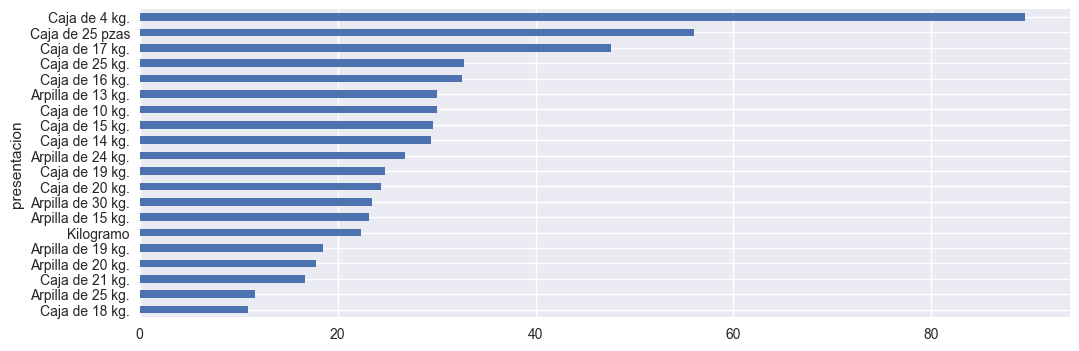

In [79]:
limones.groupby("presentacion")["precio_max"].mean().sort_values().plot(kind="barh")

<Axes: ylabel='presentacion'>

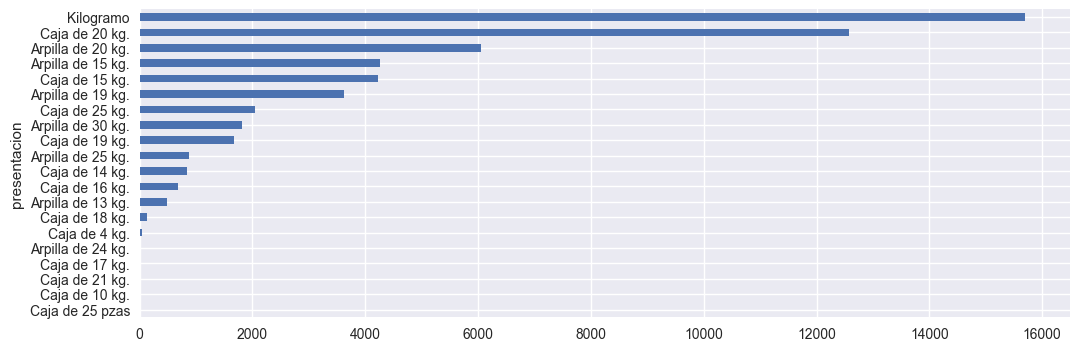

In [80]:
limones.groupby("presentacion")["precio_max"].count().sort_values().plot(kind="barh")

In [81]:
limones_kg  = limones[limones["presentacion"] == "Kilogramo"]

<Axes: xlabel='fecha'>

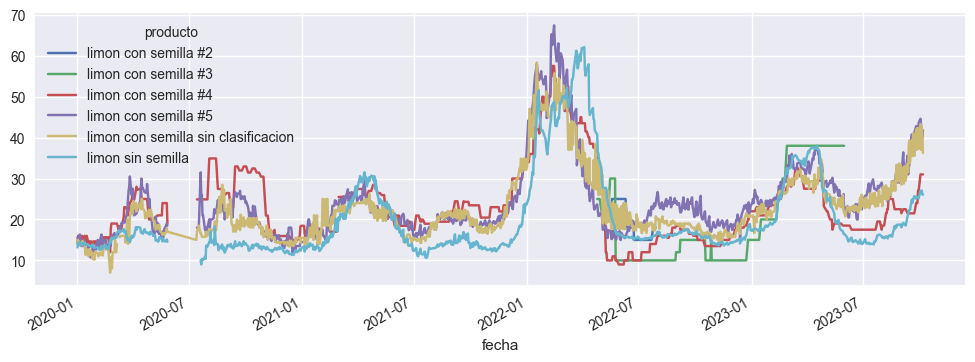

In [82]:
limones_kg_pivot = limones_kg.pivot_table(index="fecha", columns= "producto", values="precio_max")
limones_kg_pivot.plot(kind="line")

In [83]:
limones_kg_pivot.describe()

producto,limon con semilla #2,limon con semilla #3,limon con semilla #4,limon con semilla #5,limon con semilla sin clasificacion,limon sin semilla
count,60.000000,279.000000,907.000000,916.000000,916.000000,913.000000
mean,19.466667,19.724014,23.026920,24.174432,22.715648,19.908481
std,4.159802,11.197660,8.871706,9.386262,8.445746,10.193561
min,15.000000,10.000000,9.000000,10.750000,7.000000,9.000000
25%,15.000000,10.000000,17.500000,18.475000,17.333333,13.916667
50%,18.000000,15.000000,21.000000,22.000000,20.437500,15.833333
75%,25.000000,30.000000,26.500000,26.500000,25.333333,21.142857
max,25.000000,38.000000,57.500000,67.400000,58.333333,62.111111


In [84]:
otros_limones = ['limon con semilla #2', 'limon con semilla #3',
       'limon con semilla #4', 'limon con semilla sin clasificacion', 'limon sin semilla']

In [85]:
data_snim_limon = data_snim.drop(data_snim[data_snim["producto"].isin(otros_limones)].index, axis=0)

In [105]:
data_snim_limon["producto"] = data_snim_limon["producto"].replace("limon con semilla #5", "limón")

In [107]:
data_snim_limon[data_snim_limon["producto"] == "limón"]

,fecha,producto,presentacion,origen,destino,central,precio_min,precio_max,precio_frec
1090777,2020-01-02,limón,Caja de 19 kg.,Colima,Aguascalientes,Centro Comercial Agropecuario de Aguascalientes,11.05,12.11,11.58
1090778,2020-01-02,limón,Arpilla de 15 kg.,Colima,Aguascalientes,Centro Comercial Agropecuario de Aguascalientes,10.00,11.33,10.67
1090779,2020-01-03,limón,Caja de 19 kg.,Colima,Aguascalientes,Centro Comercial Agropecuario de Aguascalientes,11.05,12.11,11.58
1090780,2020-01-03,limón,Arpilla de 15 kg.,Colima,Aguascalientes,Centro Comercial Agropecuario de Aguascalientes,10.00,11.33,10.67
1090781,2020-01-06,limón,Caja de 19 kg.,Colima,Aguascalientes,Centro Comercial Agropecuario de Aguascalientes,11.05,12.11,11.58
...,...,...,...,...,...,...,...,...,...
1111899,2023-09-29,limón,Kilogramo,Colima,Zacatecas,Mercado de Abasto de Zacatecas,32.00,32.00,32.00
1111900,2023-10-02,limón,Kilogramo,Colima,Zacatecas,Mercado de Abasto de Zacatecas,32.00,32.00,32.00
1111901,2023-10-03,limón,Kilogramo,Colima,Zacatecas,Mercado de Abasto de Zacatecas,32.00,32.00,32.00
1111902,2023-10-04,limón,Kilogramo,Colima,Zacatecas,Mercado de Abasto de Zacatecas,32.00,32.00,32.00


In [121]:
data_snim_limon[data_snim_limon["producto"]=="limón"]

,fecha,producto,presentacion,origen,destino,central,precio_min,precio_max,precio_frec
1090777,2020-01-02,limón,Caja de 19 kg.,Colima,Aguascalientes,Centro Comercial Agropecuario de Aguascalientes,11.05,12.11,11.58
1090778,2020-01-02,limón,Arpilla de 15 kg.,Colima,Aguascalientes,Centro Comercial Agropecuario de Aguascalientes,10.00,11.33,10.67
1090779,2020-01-03,limón,Caja de 19 kg.,Colima,Aguascalientes,Centro Comercial Agropecuario de Aguascalientes,11.05,12.11,11.58
1090780,2020-01-03,limón,Arpilla de 15 kg.,Colima,Aguascalientes,Centro Comercial Agropecuario de Aguascalientes,10.00,11.33,10.67
1090781,2020-01-06,limón,Caja de 19 kg.,Colima,Aguascalientes,Centro Comercial Agropecuario de Aguascalientes,11.05,12.11,11.58
...,...,...,...,...,...,...,...,...,...
1111899,2023-09-29,limón,Kilogramo,Colima,Zacatecas,Mercado de Abasto de Zacatecas,32.00,32.00,32.00
1111900,2023-10-02,limón,Kilogramo,Colima,Zacatecas,Mercado de Abasto de Zacatecas,32.00,32.00,32.00
1111901,2023-10-03,limón,Kilogramo,Colima,Zacatecas,Mercado de Abasto de Zacatecas,32.00,32.00,32.00
1111902,2023-10-04,limón,Kilogramo,Colima,Zacatecas,Mercado de Abasto de Zacatecas,32.00,32.00,32.00


In [122]:
frutas

['jitomate',
 'chile verde',
 'limón',
 'pepino',
 'plátano',
 'mango',
 'garbanzo',
 'brócoli',
 'cebolla',
 'sandía',
 'papaya',
 'calabacita',
 'lechuga',
 'tomate verde',
 'espárrago',
 'frambuesa',
 'nopalitos',
 'nuez',
 'fresa',
 'toronja',
 'zarzamora',
 'piña',
 'coliflor',
 'frijol',
 'berenjena',
 'uva de mesa',
 'guayaba',
 'naranja',
 'papa',
 'melón',
 'manzana',
 'pera',
 'durazno']

In [123]:
data_snim_obj = data_snim_limon[data_snim_limon["producto"].isin(frutas)]

In [132]:
data_snim_obj[data_snim_obj["producto"] == "limón"]

,fecha,producto,presentacion,origen,destino,central,precio_min,precio_max,precio_frec
1090777,2020-01-02,limón,Caja de 19 kg.,Colima,Aguascalientes,Centro Comercial Agropecuario de Aguascalientes,11.05,12.11,11.58
1090778,2020-01-02,limón,Arpilla de 15 kg.,Colima,Aguascalientes,Centro Comercial Agropecuario de Aguascalientes,10.00,11.33,10.67
1090779,2020-01-03,limón,Caja de 19 kg.,Colima,Aguascalientes,Centro Comercial Agropecuario de Aguascalientes,11.05,12.11,11.58
1090780,2020-01-03,limón,Arpilla de 15 kg.,Colima,Aguascalientes,Centro Comercial Agropecuario de Aguascalientes,10.00,11.33,10.67
1090781,2020-01-06,limón,Caja de 19 kg.,Colima,Aguascalientes,Centro Comercial Agropecuario de Aguascalientes,11.05,12.11,11.58
...,...,...,...,...,...,...,...,...,...
1111899,2023-09-29,limón,Kilogramo,Colima,Zacatecas,Mercado de Abasto de Zacatecas,32.00,32.00,32.00
1111900,2023-10-02,limón,Kilogramo,Colima,Zacatecas,Mercado de Abasto de Zacatecas,32.00,32.00,32.00
1111901,2023-10-03,limón,Kilogramo,Colima,Zacatecas,Mercado de Abasto de Zacatecas,32.00,32.00,32.00
1111902,2023-10-04,limón,Kilogramo,Colima,Zacatecas,Mercado de Abasto de Zacatecas,32.00,32.00,32.00


In [124]:
data_snim_bajacalifronia = data_snim_obj[data_snim_obj["destino"] == "Baja California"]

In [131]:
data_snim_BC = data_snim_bajacalifronia.groupby(["producto", "fecha"]).max()
data_snim_BC.loc["berenjena"]

,presentacion,origen,destino,central,precio_min,precio_max,precio_frec
fecha,,,,,,,
2020-05-13,Kilogramo,Baja California,Baja California,"Central de Abasto INDIA, Tijuana",40.0,40.0,40.0
2020-05-14,Kilogramo,Baja California,Baja California,"Central de Abasto INDIA, Tijuana",40.0,40.0,40.0
2020-05-15,Kilogramo,Baja California,Baja California,"Central de Abasto INDIA, Tijuana",40.0,40.0,40.0
2020-05-18,Kilogramo,Baja California,Baja California,"Central de Abasto INDIA, Tijuana",40.0,40.0,40.0
2020-05-19,Kilogramo,Baja California,Baja California,"Central de Abasto INDIA, Tijuana",43.0,43.0,43.0
...,...,...,...,...,...,...,...
2023-10-02,Kilogramo,Baja California,Baja California,"Central de Abasto INDIA, Tijuana",35.0,35.0,35.0
2023-10-03,Kilogramo,Baja California,Baja California,"Central de Abasto INDIA, Tijuana",35.0,35.0,35.0
2023-10-04,Kilogramo,Baja California,Baja California,"Central de Abasto INDIA, Tijuana",35.0,35.0,35.0


In [126]:
sample = data_snim_bajacalifronia[data_snim_bajacalifronia["producto"]=="limón"]
sample

,fecha,producto,presentacion,origen,destino,central,precio_min,precio_max,precio_frec


In [127]:
print(sample.presentacion.unique(), sample.origen.unique(), sample.central.unique())

[] [] []
